<a href="https://colab.research.google.com/github/BeaEsparcia/Spanish_Text_Classification_BERT/blob/main/text_classification_bert_es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text classification with BERT (SimpleTransformers)
This project implements a Spanish text classifier based on BERT to categorize messages into three classes:  
- **Requests for information**  
- **Complaints or claims**  
- **Recommendations**

The main objective is to demonstrate the ability to fine-tune a pretrained language model (BERT) for text classification tasks in Spanish.  
The pipeline includes data preparation, model training, evaluation, and analysis of results.


In [3]:

"""
Text Classification with BERT (SimpleTransformers)

This script sets up the environment and necessary libraries for building
a BERT-based text classifier in Spanish. The goal is to classify messages
into three categories: information requests, complaints, and recommendations.

Libraries used:
- pandas: data manipulation
- sklearn: train/test split and evaluation metrics
- simpletransformers: simplified interface for BERT fine-tuning
- matplotlib / seaborn: result visualization
"""

# Data handling and preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split

# Text classification model (BERT wrapper)
!pip install simpletransformers
from simpletransformers.classification import ClassificationModel

# Evaluation metrics
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Optional: parallel processing for tokenization
import multiprocessing as mp


# Set multiprocessing start method to 'spawn' to avoid issues with os.fork() in multi-threaded environments
# This is especially important when using tokenization with multiple workers in SimpleTransformers
mp.set_start_method('spawn', force=True)



### Dataset Creation

To train and evaluate the model, I created a synthetic dataset for a three-class text classification task in Spanish.  
The three categories represent typical user intents in customer support scenarios:

- **Class 0** → Information requests  
- **Class 1** → Complaints  
- **Class 2** → Recommendations

Each data point consists of a natural language message and its corresponding label.  
This dataset simulates real user queries and is designed to fine-tune a multilingual BERT model (`dccuchile/bert-base-spanish-wwm-uncased`) for intent classification in customer interactions.

*Note: Since no real labeled data was available, I manually wrote a diverse set of examples for each class to ensure coverage and variety.*


In [4]:
# Class 0: Information requests

category_0 = [
    ["¿A qué hora abren los domingos?", 0],
    ["¿Tienen alguna promoción para nuevos clientes?", 0],
    ["¿Cuánto cuesta el envío a Madrid?", 0],
    ["¿Puedo devolver un producto si no estoy satisfecho?", 0],
    ["¿Dónde puedo encontrar el manual de usuario?", 0],
    ["¿Hay estacionamiento cerca de la tienda?", 0],
    ["¿Aceptan pagos con PayPal?", 0],
    ["¿Cuáles son los requisitos para aplicar a la oferta de trabajo?", 0],
    ["¿Cuánto tiempo tarda el servicio de reparación?", 0],
    ["¿Me podrían enviar un catálogo de productos?", 0],
    ["¿Puedo cambiar la dirección de entrega después de hacer el pedido?", 0],
    ["¿Este producto tiene garantía?", 0],
    ["¿Dónde se encuentra la sucursal más cercana?", 0],
    ["¿Hacen entregas los fines de semana?", 0],
    ["¿Tienen envío internacional?", 0],
    ["¿Puedo modificar mi pedido después de realizarlo?", 0],
    ["¿Cómo puedo rastrear mi pedido?", 0],
    ["¿Tienen tienda física?", 0],
    ["¿Cuánto cuesta una membresía anual?", 0],
    ["¿Cómo puedo cancelar mi suscripción?", 0],
    ["¿Puedo pagar en efectivo al recibir mi pedido?", 0],
    ["¿Cuánto tardan los envíos en llegar?", 0],
    ["¿Dónde puedo ver el estado de mi pedido?", 0],
    ["¿Puedo reservar un producto que está fuera de stock?", 0],
    ["¿Tienen servicio de atención al cliente 24/7?", 0],
    ["¿Cuál es el tiempo de garantía de los productos?", 0],
    ["¿Cuáles son las opciones de pago disponibles?", 0],
    ["¿Puedo solicitar una factura con mis datos fiscales?", 0],
    ["¿Cuál es el horario de atención al cliente?", 0],
    ["¿Puedo recibir asistencia técnica a domicilio?", 0],
    ["¿Hay algún cargo adicional por pagos con tarjeta?", 0],
    ["¿Cómo puedo cambiar mi dirección de facturación?", 0],
    ["¿Dónde puedo encontrar su política de privacidad?", 0],
    ["¿Qué métodos de pago aceptan?", 0],
    ["¿Ofrecen servicio de instalación?", 0],
    ["¿Puedo programar la entrega en una fecha específica?", 0],
    ["¿Cuántas cuotas puedo pagar con tarjeta de crédito?", 0],
    ["¿Cuál es el costo del servicio técnico?", 0],
    ["¿Cómo puedo registrarme para recibir noticias y promociones?", 0],
    ["¿Puedo recibir una cotización para una compra mayorista?", 0],
    ["¿Cuál es su política de devoluciones?", 0],
    ["¿Tienen descuentos por compras grandes?", 0],
    ["¿Hay algún cargo por cancelación de pedido?", 0],
    ["¿Cuáles son los tiempos de entrega estándar?", 0],
    ["¿Puedo cambiar el método de pago después de realizar el pedido?", 0],
    ["¿Cómo puedo contactar con su servicio de atención al cliente?", 0],
    ["¿Tienen algún programa de fidelidad?", 0],
    ["¿Puedo hacer un pedido personalizado?", 0],
    ["¿Cómo puedo saber si mi pedido ha sido enviado?", 0],
    ["¿Tienen algún descuento para estudiantes?", 0],
    ["¿Cómo puedo modificar los datos de mi cuenta?", 0],
    ["¿Puedo añadir productos a mi pedido una vez realizado?", 0],
    ["¿Puedo hacer una reserva de producto en línea?", 0],
    ["¿Cuál es el número de contacto para servicio al cliente?", 0],
    ["¿Puedo pagar con tarjeta de débito?", 0],
    ["¿Tienen política de protección de datos personales?", 0],
    ["¿Tienen servicio de chat en vivo?", 0],
    ["¿Puedo obtener un reembolso si no estoy satisfecho?", 0],
    ["¿Tienen opciones de financiación?", 0],
    ["¿Ofrecen tarjetas de regalo?", 0],
    ["¿Cómo puedo obtener una copia de mi recibo de compra?", 0],
    ["¿Tienen productos en oferta actualmente?", 0],
    ["¿Puedo hacer un seguimiento en tiempo real de mi envío?", 0],
    ["¿Tienen garantía extendida?", 0],
    ["¿Ofrecen soporte técnico telefónico?", 0],
    ["¿Puedo cancelar mi pedido antes de que sea enviado?", 0],
    ["¿Tienen alguna promoción especial por temporada?", 0],
    ["¿Cuánto tarda el reembolso una vez aprobado?", 0],
    ["¿Dónde puedo descargar su aplicación móvil?", 0],
    ["¿Qué hago si olvidé mi contraseña?", 0],
    ["¿Cuáles son los horarios de entrega?", 0],
    ["¿Tienen productos exclusivos en línea?", 0],
    ["¿Cómo puedo suscribirme a su boletín de noticias?", 0],
    ["¿Ofrecen asistencia en la instalación de productos?", 0],
    ["¿Cómo puedo cancelar una suscripción a su servicio?", 0],
    ["¿Puedo programar una cita en su tienda?", 0],
    ["¿Tienen productos ecológicos?", 0],
    ["¿Tienen servicio de atención por teléfono?", 0],
    ["¿Qué hago si mi producto no funciona correctamente?", 0],
    ["¿Ofrecen envíos express?", 0],
    ["¿Cómo puedo hacer una queja formal?", 0],
    ["¿Puedo cambiar mi correo electrónico registrado?", 0],
    ["¿Cómo puedo agregar una nueva dirección de entrega?", 0],
    ["¿Ofrecen productos para empresas?", 0],
    ["¿Cuál es su política de intercambio de productos?", 0],
    ["¿Puedo obtener puntos por compras realizadas?", 0],
    ["¿Cómo puedo verificar la disponibilidad de productos?", 0],
    ["¿Puedo programar una devolución de producto en línea?", 0],
    ["¿Ofrecen atención en otros idiomas?", 0],
    ["¿Puedo transferir mi pedido a otra persona?", 0],
    ["¿Puedo recoger mi pedido en una tienda física?", 0],
    ["¿Cómo puedo aplicar un código de descuento?", 0],
    ["¿Cuáles son las políticas de seguridad en su sitio web?", 0],
]

In [5]:
# Class 1: Complaints

category_1 = [
    ["El producto llegó roto, quiero un reembolso.", 1],
    ["El servicio al cliente fue pésimo, nadie me ayudó.", 1],
    ["Hice un pedido hace una semana y todavía no llega.", 1],
    ["El pedido llegó incompleto, faltan productos.", 1],
    ["El sitio web es muy lento, apenas pude hacer mi pedido.", 1],
    ["Pedí una talla M y me mandaron una S, esto es inaceptable.", 1],
    ["La comida llegó fría y mal presentada.", 1],
    ["Me cobraron de más en mi factura, necesito una solución.", 1],
    ["El técnico nunca apareció en la cita programada.", 1],
    ["El producto no cumple con las especificaciones que anunciaron.", 1],
    ["La entrega fue muy tarde, ya no la necesitaba.", 1],
    ["El pedido llegó a la dirección equivocada.", 1],
    ["Estoy muy descontento con la calidad del servicio.", 1],
    ["El producto llegó dañado y no puedo usarlo.", 1],
    ["El envío fue más caro de lo que me dijeron al principio.", 1],
    ["El pedido fue cancelado sin ninguna explicación.", 1],
    ["El reembolso tardó demasiado en procesarse.", 1],
    ["No recibí el producto que había solicitado.", 1],
    ["El soporte técnico no fue capaz de resolver mi problema.", 1],
    ["No me enviaron la factura de mi compra.", 1],
    ["La atención en la tienda fue muy deficiente.", 1],
    ["El pedido llegó con piezas faltantes.", 1],
    ["Me prometieron un descuento que no fue aplicado.", 1],
    ["El embalaje del producto estaba en mal estado.", 1],
    ["El producto que compré no funciona correctamente.", 1],
    ["El proceso de devolución es demasiado complicado.", 1],
    ["El sistema de pago tuvo errores y duplicó mi compra.", 1],
    ["El servicio de entrega fue muy ineficiente.", 1],
    ["El producto no era como lo describieron en la web.", 1],
    ["Tuve que esperar mucho tiempo para recibir asistencia.", 1],
    ["El técnico instaló mal el producto.", 1],
    ["El pedido llegó tarde y no lo pude usar.", 1],
    ["El servicio al cliente no responde a mis correos.", 1],
    ["Recibí productos que no pedí.", 1],
    ["El producto no cumplió con mis expectativas.", 1],
    ["No me dieron ninguna solución a mi problema.", 1],
    ["El repartidor fue grosero y maleducado.", 1],
    ["Mi pedido fue cancelado sin motivo aparente.", 1],
    ["La comida llegó con mal sabor y en malas condiciones.", 1],
    ["El soporte por chat fue inútil, no resolvieron nada.", 1],
    ["Me enviaron productos que no estaban en mi pedido.", 1],
    ["El servicio que recibí no justificaba el precio.", 1],
    ["El proceso de compra fue muy confuso y complicado.", 1],
    ["El producto llegó con un defecto de fábrica.", 1],
    ["Me cobraron por un servicio que nunca recibí.", 1],
    ["No pude cancelar el pedido a tiempo.", 1],
    ["El paquete llegó abierto y en malas condiciones.", 1],
    ["El producto se rompió después de usarlo solo una vez.", 1],
    ["El sistema de pagos falló y me cobraron dos veces.", 1],
    ["El reembolso fue menor al precio que pagué.", 1],
    ["El pedido llegó sin el accesorio principal.", 1],
    ["La plataforma web se cae constantemente.", 1],
    ["El producto estaba fuera de stock pero igual me cobraron.", 1],
    ["El servicio técnico fue muy lento en venir a revisar el producto.", 1],
    ["Me hicieron esperar mucho tiempo en la línea de atención al cliente.", 1],
    ["El producto no llegó en el color que pedí.", 1],
    ["No me dieron el reembolso completo que me habían prometido.", 1],
    ["El pedido llegó a una dirección incorrecta y no lo recuperé.", 1],
    ["El producto se dañó antes de la fecha de entrega.", 1],
    ["El producto estaba usado cuando llegó.", 1],
    ["No me dieron una solución satisfactoria a mi problema.", 1],
    ["El servicio fue muy caro para lo que ofrecieron.", 1],
    ["Tuve que hacer muchas llamadas para resolver mi problema.", 1],
    ["El producto no es compatible con lo que indicaron.", 1],
    ["La experiencia de compra en línea fue terrible.", 1],
    ["El servicio prometido nunca fue entregado.", 1],
    ["El pedido nunca llegó y nadie me dio explicaciones.", 1],
    ["El servicio al cliente fue muy grosero y poco servicial.", 1],
    ["El pedido fue entregado a otra persona.", 1],
    ["El producto venía con piezas rotas y no me ofrecieron una solución.", 1],
    ["El soporte técnico no respondió a mi solicitud de ayuda.", 1],
    ["La comida llegó en mal estado y con mal olor.", 1],
    ["Me hicieron esperar más de una hora en la tienda.", 1],
    ["El producto no era el que se mostraba en la página web.", 1],
    ["El sistema de devoluciones es muy engorroso y confuso.", 1],
    ["El servicio al cliente me dio información errónea.", 1],
    ["El proceso de pago fue confuso y complicado.", 1],
    ["El producto llegó defectuoso y no lo reemplazaron.", 1],
    ["El repartidor no llegó en el horario prometido.", 1],
    ["El pedido fue enviado a otro país por error.", 1],
    ["El producto se rompió a los pocos días de uso.", 1],
    ["Me hicieron pagar más por un servicio adicional sin mi consentimiento.", 1],
    ["El paquete llegó incompleto y no me dieron una solución.", 1],
]


In [6]:
# Class 2: Recommendations

category_2 = [
    ["Recomiendo totalmente esta tienda, siempre cumplen con los tiempos.", 2],
    ["Si buscan buen servicio al cliente, esta es la empresa adecuada.", 2],
    ["Les sugiero que prueben el nuevo menú, es realmente delicioso.", 2],
    ["Mis amigos también han comprado aquí y están muy contentos.", 2],
    ["No duden en comprar en este sitio, nunca he tenido problemas.", 2],
    ["Recomiendo usar esta app, es muy fácil de usar y eficiente.", 2],
    ["Si necesitan ropa de calidad, esta tienda es la mejor opción.", 2],
    ["Mis colegas y yo siempre utilizamos sus servicios, muy recomendados.", 2],
    ["Es la mejor opción si buscan algo confiable y rápido.", 2],
    ["Recomiendo esta marca, siempre cumplen con sus promesas.", 2],
    ["Recomiendo que todos prueben su servicio de suscripción, es genial.", 2],
    ["Este restaurante es excelente, recomiendo a todos que lo visiten.", 2],
    ["Recomiendo este producto a cualquiera que necesite durabilidad y calidad.", 2],
    ["El servicio fue impecable, definitivamente lo recomendaré a todos.", 2],
    ["Me encanta comprar aquí, siempre tienen lo que necesito.", 2],
    ["Este lugar es mi favorito, siempre son puntuales y amables.", 2],
    ["Muy recomendable, excelente servicio y atención.", 2],
    ["Todos en mi familia compran aquí, siempre satisfechos.", 2],
    ["Sin duda recomendaré este sitio a todos mis conocidos.", 2],
    ["Gran servicio y productos de calidad, muy recomendable.", 2],
    ["Nunca he tenido problemas con ellos, siempre a tiempo.", 2],
    ["Me encanta la atención personalizada que ofrecen, lo recomiendo.", 2],
    ["Mis compañeros de trabajo también utilizan esta plataforma y les encanta.", 2],
    ["Altamente recomendable, sus productos nunca decepcionan.", 2],
    ["Este servicio es el mejor que he probado en mucho tiempo.", 2],
    ["Una de las mejores tiendas online, la recomiendo siempre.", 2],
    ["Si buscan calidad, esta es la tienda que necesitan.", 2],
    ["Gran experiencia, recomendaré a mis amigos que compren aquí.", 2],
    ["Este restaurante nunca me decepciona, altamente recomendado.", 2],
    ["Siempre tienen promociones increíbles, recomiendo aprovecharlas.", 2],
    ["Recomiendo esta tienda a todos los que buscan rapidez y buen trato.", 2],
    ["Muy buena experiencia, recomiendo este sitio sin dudar.", 2],
    ["La calidad de los productos es excepcional, lo recomiendo.", 2],
    ["Recomendaría este servicio a cualquiera que busque eficiencia.", 2],
    ["Es mi primera opción cuando necesito algo rápido y confiable.", 2],
    ["Recomiendo esta empresa a todos los que buscan soluciones rápidas.", 2],
    ["Siempre tengo una gran experiencia al comprar aquí, lo recomiendo.", 2],
    ["Este es mi lugar favorito para hacer compras en línea, recomendado.", 2],
    ["Excelente atención y productos, no dudaría en recomendarlo.", 2],
    ["Siempre recomiendo este servicio a mis amigos y familiares.", 2],
    ["Una de las mejores experiencias de compra en línea, recomendado.", 2],
    ["El servicio al cliente es de primera, lo recomiendo ampliamente.", 2],
    ["Recomiendo esta tienda para cualquiera que busque productos de calidad.", 2],
    ["Una experiencia positiva en cada compra, siempre recomiendo.", 2],
    ["Siempre satisfecho con sus productos y atención, muy recomendable.", 2],
    ["La app es muy fácil de usar, recomiendo que la descarguen.", 2],
    ["La calidad del servicio es inigualable, lo recomiendo siempre.", 2],
    ["Este restaurante nunca me falla, lo recomiendo a todos.", 2],
    ["Recomiendo suscribirse a su servicio, es muy conveniente.", 2],
    ["Si buscan algo seguro y confiable, este es el lugar.", 2],
    ["Siempre recomiendo sus productos a mis amigos, son excelentes.", 2],
    ["Recomiendo esta marca a todos, nunca me ha fallado.", 2],
    ["Muy buena atención y productos, lo recomiendo a todos.", 2],
    ["Este sitio es el mejor para compras rápidas, siempre lo recomiendo.", 2],
    ["Mis colegas y yo siempre confiamos en este servicio, altamente recomendado.", 2],
    ["El producto que compré es increíble, lo recomiendo a todos.", 2],
    ["Recomiendo este restaurante, siempre ofrecen la mejor comida.", 2],
    ["Este servicio de suscripción es perfecto para lo que necesito, lo recomiendo.", 2],
    ["Recomiendo este sitio para cualquiera que busque fiabilidad.", 2],
    ["Mis amigos siempre compran aquí por mi recomendación, muy satisfechos.", 2],
    ["Nunca dudo en recomendar este sitio, siempre cumplen.", 2],
    ["Este es el lugar que recomiendo cuando buscan calidad.", 2],
    ["Siempre son mi primera opción, recomiendo su servicio.", 2],
    ["Recomiendo esta empresa para cualquier persona que busque un buen servicio.", 2],
    ["He recomendado este servicio a muchos amigos, todos contentos.", 2],
    ["Excelente servicio al cliente, lo recomiendo mucho.", 2],
    ["Este producto es de lo mejor que he probado, altamente recomendado.", 2],
    ["Recomiendo esta marca a todos los que buscan calidad y buen precio.", 2],
    ["Es mi lugar de confianza, lo recomiendo a todos mis conocidos.", 2],
    ["Recomendaría este servicio a cualquiera que busque eficiencia y rapidez.", 2],
    ["Siempre es una buena experiencia comprar aquí, lo recomiendo.", 2],
    ["Este restaurante siempre cumple, lo recomiendo mucho.", 2],
    ["Recomiendo este servicio a cualquier persona que busque comodidad.", 2],
    ["Este sitio es excelente para compras online, recomiendo usarlo.", 2],
    ["Siempre recomiendo este sitio a todos mis amigos, nunca me ha fallado.", 2],
    ["Recomiendo este servicio a cualquiera que busque productos de calidad.", 2],
    ["Este lugar es perfecto para compras rápidas, lo recomiendo mucho.", 2],
    ["Siempre recomiendo este sitio a mis amigos, gran experiencia.", 2],
    ["Este es mi lugar favorito para hacer compras, recomiendo mucho.", 2],
    ["Recomiendo probar su servicio de suscripción, es muy eficiente.", 2],
    ["Muy buena atención y rapidez, recomiendo este sitio siempre.", 2],
]


In [7]:
"""
Merge all message categories into a single list of examples,
each represented as [text, label].
"""

data = category_0 + category_1 + category_2


"""
Convert the full dataset into a pandas DataFrame,
with two columns: 'text' (message in Spanish) and 'labels' (category).
This format is required by the classification model.
"""

df = pd.DataFrame(data, columns=["text", "labels"])

# Display the DataFrame to verify the structure and content
print(df.head())

"""
Make sure the label column is of integer type.
This prevents issues during model training, especially when the data comes from mixed sources.
"""
df["labels"] = df["labels"].astype(int)


                                                text  labels
0                    ¿A qué hora abren los domingos?       0
1     ¿Tienen alguna promoción para nuevos clientes?       0
2                  ¿Cuánto cuesta el envío a Madrid?       0
3  ¿Puedo devolver un producto si no estoy satisf...       0
4       ¿Dónde puedo encontrar el manual de usuario?       0


In [8]:
# --- Split the dataset into training and evaluation sets ---
# Reserve 20% of the data for evaluation; use stratification to preserve class distribution
train_df, eval_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df["labels"],
    random_state=42
)

# Display sample rows from the training and evaluation sets to verify the split
print("Training data:")
print(train_df.head())

print("\nEvaluation data:")
print(eval_df.head())


Training data:
                                                  text  labels
149  No me dieron el reembolso completo que me habí...       1
31    ¿Cómo puedo cambiar mi dirección de facturación?       0
87   ¿Puedo programar una devolución de producto en...       0
9         ¿Me podrían enviar un catálogo de productos?       0
117  El producto que compré no funciona correctamente.       1

Evaluation data:
                                                  text  labels
1       ¿Tienen alguna promoción para nuevos clientes?       0
177  Si buscan buen servicio al cliente, esta es la...       2
52      ¿Puedo hacer una reserva de producto en línea?       0
99              La comida llegó fría y mal presentada.       1
2                    ¿Cuánto cuesta el envío a Madrid?       0


In [9]:
# --- Configure the pretrained BERT model in Spanish ---
model = ClassificationModel(
    "bert",
    "dccuchile/bert-base-spanish-wwm-uncased",  # Spanish-language BERT model
    num_labels=3,  # Three target classes in our classification task
    args={
        "overwrite_output_dir": True,  # Overwrite previous outputs (useful for re-runs)
        "num_train_epochs": 5,  # Number of training epochs
        "learning_rate": 2e-5,  # Standard fine-tuning learning rate for BERT
    }
)


"""
Model configuration:
- "bert": Specifies the architecture (BERT, as it performs well on NLP tasks).
- "dccuchile/bert-base-spanish-wwm-uncased": Pretrained BERT model for Spanish (Whole Word Masking, uncased).
- num_labels=3: Matches the number of categories — information request, complaint, recommendation.
- overwrite_output_dir=True: Allows repeated runs without manual cleanup.
- num_train_epochs=5: A balanced choice to learn from the data while reducing overfitting risk.
- learning_rate=2e-5: Common fine-tuning learning rate for stability and gradual adaptation.
"""


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


'\nModel configuration:\n- "bert": Specifies the architecture (BERT, as it performs well on NLP tasks).\n- "dccuchile/bert-base-spanish-wwm-uncased": Pretrained BERT model for Spanish (Whole Word Masking, uncased).\n- num_labels=3: Matches the number of categories — information request, complaint, recommendation.\n- overwrite_output_dir=True: Allows repeated runs without manual cleanup.\n- num_train_epochs=5: A balanced choice to learn from the data while reducing overfitting risk.\n- learning_rate=2e-5: Common fine-tuning learning rate for stability and gradual adaptation.\n'

In [10]:
# --- Train the model ---
# --- Configure the Spanish BERT model with evaluation and early stopping ---
model = ClassificationModel(
    "bert",
    "dccuchile/bert-base-spanish-wwm-uncased",
    num_labels=3,
    args={
        "overwrite_output_dir": True,
        "num_train_epochs": 10,  # Allow more epochs; early stopping will prevent overtraining
        "learning_rate": 2e-5,
        "evaluate_during_training": True,
        "evaluate_during_training_verbose": True,
        "eval_batch_size": 16,
        "train_batch_size": 16,
        "use_early_stopping": True,
        "early_stopping_patience": 2,
        "early_stopping_delta": 0.01,
        "early_stopping_metric": "eval_loss",
        "early_stopping_metric_minimize": True,
        "save_eval_checkpoints": False,
        "save_model_every_epoch": False,
        "weight_decay": 0.01,  # Add regularization to avoid memorization
        "reprocess_input_data": True,  # Needed when changing input data
        "fp16": False  # Can be set to True if you're on GPU with mixed precision
    }
)

# Train the model with evaluation after each epoch
model.train_model(train_df, eval_df=eval_df)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


0it [00:00, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/13 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/13 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/13 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/13 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/13 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/13 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/13 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/13 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/13 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Running Epoch 10 of 10:   0%|          | 0/13 [00:00<?, ?it/s]

0it [00:00, ?it/s]

(130,
 defaultdict(list,
             {'global_step': [13, 26, 39, 52, 65, 78, 91, 104, 117, 130],
              'train_loss': [0.631271481513977,
               0.10538992285728455,
               0.013239249587059021,
               0.005272159352898598,
               0.003673605853691697,
               0.00315826665610075,
               0.0026753826532512903,
               0.0027705789543688297,
               0.0027401524130254984,
               0.0024537008721381426],
              'mcc': [np.float64(1.0),
               np.float64(1.0),
               np.float64(1.0),
               np.float64(1.0),
               np.float64(1.0),
               np.float64(1.0),
               np.float64(1.0),
               np.float64(1.0),
               np.float64(1.0),
               np.float64(1.0)],
              'eval_loss': [0.4725762605667114,
               0.0526326484978199,
               0.008347157388925552,
               0.003939196700230241,
               0.002758328104391

In [11]:
# --- Evaluate the model ---
# Evaluate the trained model on the validation set and return performance metrics
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

# Print evaluation metrics
print("Evaluation results:")
print(result)


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/4 [00:00<?, ?it/s]

Evaluation results:
{'mcc': np.float64(1.0), 'eval_loss': 0.0018003055884037167}


In [12]:
# --- Make predictions ---
# Generate predictions on the evaluation set
predictions, raw_outputs = model.predict(eval_df["text"].tolist())

# Display misclassified examples to understand where the model is struggling
print("Misclassified examples:")
for i, (pred, true) in enumerate(zip(predictions, eval_df["labels"])):
    if pred != true:
        print(f"Text: {eval_df.iloc[i]['text']}")
        print(f"Predicted label: {pred}")
        print(f"True label: {true}\n")

# Show only first 10 misclassified examples
error_count = 0
for i, (pred, true) in enumerate(zip(predictions, eval_df["labels"])):
    if pred != true:
        print(f"Text: {eval_df.iloc[i]['text']}")
        print(f"Predicted label: {pred}")
        print(f"True label: {true}\n")
        error_count += 1
        if error_count == 10:
            break

# Prepare true and predicted labels for detailed metric computation
y_true = eval_df["labels"].tolist()  # True labels from the evaluation set
y_pred = predictions  # Predicted labels from the model


0it [00:00, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Misclassified examples:


                     precision    recall  f1-score   support

Information Request       1.00      1.00      1.00        19
          Complaint       1.00      1.00      1.00        17
     Recommendation       1.00      1.00      1.00        16

           accuracy                           1.00        52
          macro avg       1.00      1.00      1.00        52
       weighted avg       1.00      1.00      1.00        52



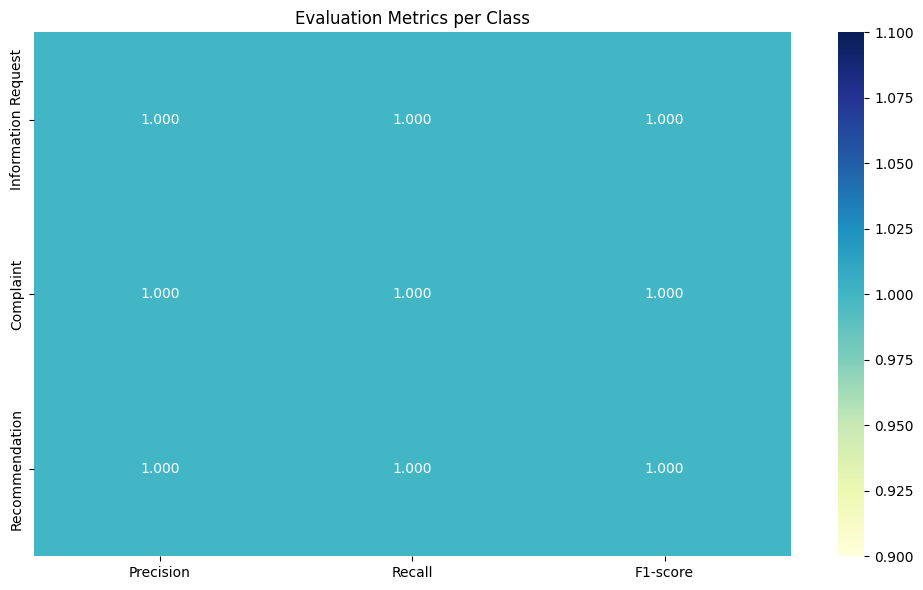

Average Precision: 1.000
Average Recall: 1.000
Average F1-score: 1.000


In [13]:
# Explanation of key evaluation metrics:
#
# 1. Precision:
#    - Measures the proportion of positive predictions that are actually correct.
#    - High precision means that when the model predicts a certain class, it is usually right.
#
# 2. Recall:
#    - Measures the proportion of actual positives that were correctly identified.
#    - High recall means the model is good at capturing most instances of a class.
#
# 3. F1-Score:
#    - Harmonic mean of precision and recall, providing a balance between the two.
#    - A high F1-score indicates the model has both good precision and good recall.
#
# These metrics help us understand how well the model is performing when classifying texts
# into the categories of information request, complaint, or recommendation.


# Compute precision, recall, and F1-score per class
report = classification_report(
    y_true,
    y_pred,
    target_names=["Information Request", "Complaint", "Recommendation"],
    output_dict=True
)

# Extract class-wise precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(
    y_true,
    y_pred,
    average=None
)

# Print the classification report to display precision, recall and F1-score per class
print(classification_report(y_true, y_pred, target_names=["Information Request", "Complaint", "Recommendation"]))

# Create a DataFrame to store class-wise metrics
df_metrics = pd.DataFrame({
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1_score
}, index=["Information Request", "Complaint", "Recommendation"])


# Visualize evaluation metrics using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_metrics, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Evaluation Metrics per Class")
plt.tight_layout()
plt.show()

# Compute average (macro) precision, recall, and F1-score across all classes
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1 = np.mean(f1_score)

print(f"Average Precision: {avg_precision:.3f}")
print(f"Average Recall: {avg_recall:.3f}")
print(f"Average F1-score: {avg_f1:.3f}")


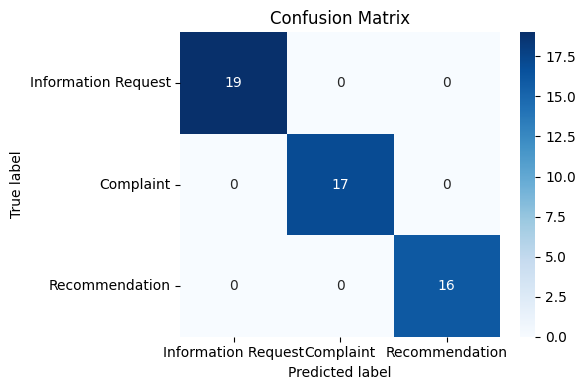

In [14]:
# --- Generate the Confusion Matrix to visualize model predictions ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Information Request", "Complaint", "Recommendation"],
            yticklabels=["Information Request", "Complaint", "Recommendation"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

###Bonus: Challenging Examples (Edge Cases)

Although the model achieved perfect scores on the validation set, real-world messages are rarely clean and unambiguous.  
To test the model’s robustness and explore its limitations, I created a set of **challenging examples** that simulate more complex, indirect, or mixed-intent user inputs.

These messages:
- Combine elements from multiple classes (e.g. a complaint + a request)
- Use indirect or ambiguous language
- Reflect real-world phrasing, beyond synthetic data

This test helps assess how well the model handles edge cases and gives insight into possible improvements for future iterations.


In [15]:
# Challenging / ambiguous examples (text in Spanish, labels as before)
challenging_examples = [
    # Requests with a complaint tone
    ["¿Podrían explicarme por qué sus precios son tan altos en comparación con la competencia?", 0],
    ["Me gustaría saber si tienen algún producto similar al excelente modelo X de la marca Y", 0],
    ["¿Cuándo van a mejorar su pésimo servicio de atención al cliente?", 0],

    # Complaints with a recommendation or request tone
    ["Aunque normalmente recomiendo sus servicios, esta vez estoy muy decepcionado con la calidad del producto", 1],
    ["El producto que recibí está defectuoso. ¿Podrían indicarme cómo proceder con la devolución?", 1],
    ["Su servicio al cliente es terrible, pero me pregunto si tienen alguna política de compensación", 1],

    # Recommendations with subtle criticism or embedded questions
    ["Recomiendo este producto a pesar de que la entrega fue un poco lenta. ¿Tienen planes para mejorar los tiempos de envío?", 2],
    ["El servicio es genial, pero los precios son un poco altos. Aun así, creo que vale la pena probarlo", 2],
    ["Aunque tuve algunos problemas al principio, ahora recomiendo totalmente este servicio. ¿Ofrecen descuentos para clientes frecuentes?", 2],

    # Ambiguous or multi-intent cases
    ["No estoy seguro si estoy satisfecho o decepcionado con mi compra. ¿Tienen alguna política de devolución?", 0],
    ["Su producto es bueno, pero el servicio al cliente necesita mejorar. ¿Cómo puedo contactar a un supervisor?", 1],
    ["Me gustaría recomendar su tienda, pero primero necesito saber más sobre sus políticas de privacidad", 2],
    ["Quiero quejarme del retraso en mi pedido, pero también preguntar si tienen disponible el producto en otro color. Por cierto, mis amigos hablan muy bien de su tienda", 1],
    ["Aunque recomiendo su servicio, tengo una pregunta sobre la facturación y una queja sobre el último envío", 2],
    ["¿Podrían explicarme por qué debería elegir su producto sobre el de la competencia? He oído cosas buenas, pero también algunas quejas", 0]
]



In [16]:
# Run predictions on challenging examples
texts = [example[0] for example in challenging_examples]
true_labels = [example[1] for example in challenging_examples]

challenging_preds, _ = model.predict(texts)

# Compare predictions with expected labels
print("Challenging Example Evaluation:\n")
for i, (text, true_label) in enumerate(zip(texts, true_labels)):
    print(f"Texto: {text}")
    print(f"Etiqueta esperada: {true_label}")
    print(f"Etiqueta predicha por el modelo: {challenging_preds[i]}")
    print("----")

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Challenging Example Evaluation:

Texto: ¿Podrían explicarme por qué sus precios son tan altos en comparación con la competencia?
Etiqueta esperada: 0
Etiqueta predicha por el modelo: 0
----
Texto: Me gustaría saber si tienen algún producto similar al excelente modelo X de la marca Y
Etiqueta esperada: 0
Etiqueta predicha por el modelo: 1
----
Texto: ¿Cuándo van a mejorar su pésimo servicio de atención al cliente?
Etiqueta esperada: 0
Etiqueta predicha por el modelo: 0
----
Texto: Aunque normalmente recomiendo sus servicios, esta vez estoy muy decepcionado con la calidad del producto
Etiqueta esperada: 1
Etiqueta predicha por el modelo: 2
----
Texto: El producto que recibí está defectuoso. ¿Podrían indicarme cómo proceder con la devolución?
Etiqueta esperada: 1
Etiqueta predicha por el modelo: 0
----
Texto: Su servicio al cliente es terrible, pero me pregunto si tienen alguna política de compensación
Etiqueta esperada: 1
Etiqueta predicha por el modelo: 1
----
Texto: Recomiendo este pro

In [17]:
# Calculate accuracy on challenging examples
correct = sum(1 for i in range(len(true_labels)) if true_labels[i] == challenging_preds[i])
accuracy = correct / len(true_labels)
print(f"\nPrecisión en ejemplos desafiantes: {accuracy:.2f}")



Precisión en ejemplos desafiantes: 0.53
